In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("cardio_train.csv",sep=';')
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In this data set we have folling parameters:
1.	Age (in days)

2.	Height (in cm) 

3.	Weight (in kg)

4.	Gender 

5.	ap_hi : Systolic blood pressure
    
6.	ap_lo : Diastolic blood pressure
    
7.	Cholesterol (1: normal, 2: above normal, 3: well above normal)

8.	gluc : Glucose (1: normal, 2: above normal, 3: well above normal)
    
9.	smoke : Smoking
    
10.	alco : Alcohol intake
    
11.	active : Physical activity 
    
12.	cardio : Presence or absence of cardiovascular disease


In [3]:
#Checking for data types
data.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [4]:
data=data.drop(columns=['id'])

In [5]:
data['weight']=data['weight'].astype(int)

In [6]:
data.dtypes

age            int64
gender         int64
height         int64
weight         int32
ap_hi          int64
ap_lo          int64
cholesterol    int64
gluc           int64
smoke          int64
alco           int64
active         int64
cardio         int64
dtype: object

In [7]:
#Checking description of dataset
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,19468.786280,1.349519,164.362217,74.201671,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,2467.261818,0.476821,8.205337,14.383654,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#Checking for null values
data.isnull().any()

age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

In [9]:
#Converting age from days to years
data['age']=data['age']/365

In [10]:
data['age']=data['age'].astype(int)

In [11]:
data.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,61,1,155,69,130,80,2,2,0,0,1,0
1,40,1,163,71,110,70,1,1,0,0,1,1
2,60,1,165,70,120,80,1,1,0,0,1,0
3,39,2,165,85,120,80,1,1,1,1,1,0
4,64,1,155,62,120,80,1,1,0,0,1,0


In [12]:
data['ap_hi'].unique()

array([  130,   110,   120,   100,   140,   160,   170,   150,   147,
         115,    90,   180,    14,   125,   135,   190,   137,   153,
          11,   145,   148,   126,   105,   220,   119,   141,   165,
         164,    12,   124,   172,   902,   162,   906,   117,   134,
         166,   210,   176,   133,   116,   169,    10,   121,    16,
          80,   112,   159,   122,   113,   118,   200,   155,   142,
         131,   157,   136,   146,   138,  -100,   909,    70,   109,
          85,   106,   129,    93,     7,    95,   179,   161,   156,
         168,   132,   104,   103,   178,   175,   123,   128,   151,
          15,   139, 11500,   127,    17,   108,   144,   158,   102,
           1,  1420,    13,   143,   701,   107,   184,   149,   167,
         114,   101,    60,  1500,   181,   171,   202,  -115,   111,
         907,    20,   188,   185,   163,   173,   154,   177,  -140,
         174,  -120, 14020,  1400,   240,   191,   197,  1620,   152,
          96,   199,

In [13]:
data['ap_hi']=data['ap_hi']+150

In [14]:
data['ap_hi'].unique()

array([  280,   260,   270,   250,   290,   310,   320,   300,   297,
         265,   240,   330,   164,   275,   285,   340,   287,   303,
         161,   295,   298,   276,   255,   370,   269,   291,   315,
         314,   162,   274,   322,  1052,   312,  1056,   267,   284,
         316,   360,   326,   283,   266,   319,   160,   271,   166,
         230,   262,   309,   272,   263,   268,   350,   305,   292,
         281,   307,   286,   296,   288,    50,  1059,   220,   259,
         235,   256,   279,   243,   157,   245,   329,   311,   306,
         318,   282,   254,   253,   328,   325,   273,   278,   301,
         165,   289, 11650,   277,   167,   258,   294,   308,   252,
         151,  1570,   163,   293,   851,   257,   334,   299,   317,
         264,   251,   210,  1650,   331,   321,   352,    35,   261,
        1057,   170,   338,   335,   313,   323,   304,   327,    10,
         324,    30, 14170,  1550,   390,   341,   347,  1770,   302,
         246,   349,

In [15]:
5#Importing some more necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

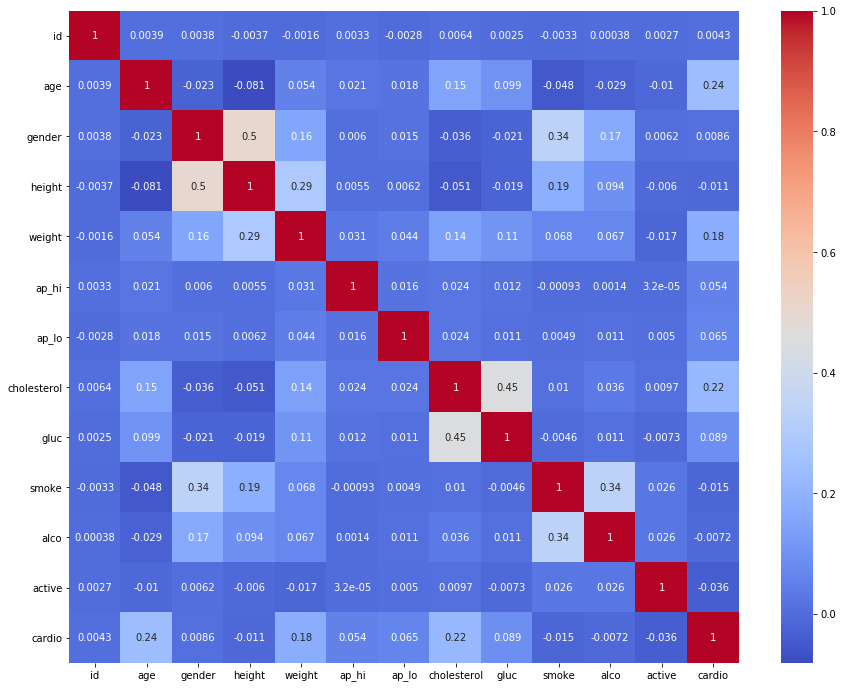

In [46]:
#Checking correlation of features with each other
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)
plt.show()

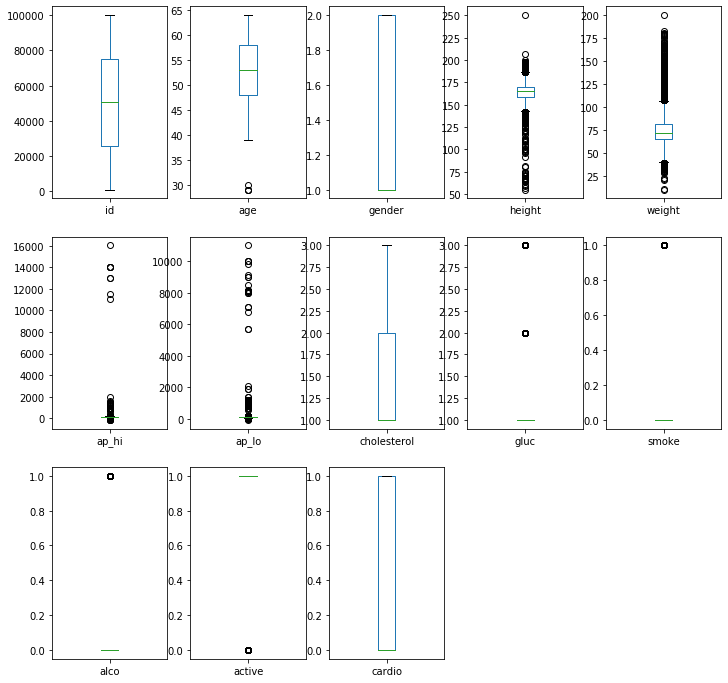

In [47]:
#Checking for outliers
data.plot(kind='box',subplots=True,layout=(3,5),figsize=(12,12))
plt.show()

In [16]:
#Using Z score to remove outliers
from scipy.stats import zscore
z_score=np.abs(zscore(data))
z_score

array([[1.20581624, 0.73302344, 1.14099939, ..., 0.23864069, 0.49376463,
        0.99917784],
       [1.89764614, 0.73302344, 0.16601717, ..., 0.23864069, 0.49376463,
        1.00082284],
       [1.05803232, 0.73302344, 0.07772839, ..., 0.23864069, 0.49376463,
        0.99917784],
       ...,
       [0.12423906, 1.36421285, 2.27143838, ..., 4.19040018, 2.02525646,
        1.00082284],
       [1.20581624, 0.73302344, 0.16601717, ..., 0.23864069, 2.02525646,
        1.00082284],
       [0.46689663, 0.73302344, 0.68709227, ..., 0.23864069, 0.49376463,
        0.99917784]])

In [17]:
print(data.shape)
thresold=3
Cardio=data[(z_score<3).all(axis=1)]
Cardio.shape

(69301, 12)


(55140, 12)

In [18]:
#Separating the input and ouput variable
df_x=Cardio.drop(columns=['cardio'])
y=Cardio['cardio']

In [19]:
#Using standard scalar method to Normalize our data or to bring all variable to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [20]:
#Importing various neccessary parameters/fetures
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score 
import warnings
warnings.filterwarnings("ignore")

In [21]:
#Checking for best random state which give best accuracy/f1 score for various training techniques used to get best prediction
# Defining a class to check for best random state and f1 score.
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
def maxf1_score(tec,x,y):
    maxf1=0
    rand=0
    for r_state in range(42,100):
        train_x,test_x,train_y,test_y=train_test_split(x, y,random_state = r_state,test_size=0.20,stratify=y)
        tec.fit(train_x,train_y)
        y_pred=tec.predict(test_x)
        temp=f1_score(test_y,y_pred)
        if temp>maxf1:
            maxf1=temp
            rand=r_state
    print("Maximum f1_score is: ",maxf1, "at random state : ",rand)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
import sklearn.naive_bayes

In [91]:
x['age'].unique

<bound method Series.unique of 0        1.216630
1       -1.882481
2        1.069053
3        1.659360
4        0.626323
           ...   
55135   -0.259137
55136    0.036016
55137    0.626323
55138    1.216630
55139    0.478746
Name: age, Length: 55140, dtype: float64>

In [23]:
train_x,test_x,train_y,test_y=train_test_split(x, y,test_size=0.20,stratify=y,random_state=42)

In [25]:
# Checking for best F1 score and random states for various techniques
LR=LogisticRegression()
maxf1_score(LR,x,y)

Maximum f1_score is:  0.7101391650099406 at random state :  52


In [24]:
DT=DecisionTreeClassifier()
maxf1_score(DT,x,y)

Maximum f1_score is:  0.6286255924170617 at random state :  47


In [26]:
# Making a loop to check other accuracy evaluation parameters for various techniques 
DT=DecisionTreeClassifier()
SV=SVC()
KNN=KNeighborsClassifier()
GN=GaussianNB()
MB=MultinomialNB()
LR=LogisticRegression()
RF=RandomForestClassifier()

In [27]:
models=[]
models.append(('DecisionTreeClassifier', DT))
models.append(('SVC', SV))
models.append(('KNeighborsClassifier',KNN))
models.append(('GaussianNB', GN))
models.append(('LogisticRegression', LR))
models.append(('RandomForestClassifier', RF))

**************** DecisionTreeClassifier ****************


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


Accuracy Score =  0.6332970620239391


Cross Value Score =  0.6374500178291627


roc_auc_score =  0.6326240093416977


Classification_report 
               precision    recall  f1-score   support

           0       0.64      0.65      0.65      5683
           1       0.62      0.61      0.62      5345

    accuracy                           0.63     11028
   macro avg       0.63      0.63      0.63     11028
weighted avg       0.63      0.63      0.63     11028



[[3720 1963]
 [2081 3264]]


AxesSubplot(0.125,0.808774;0.62x0

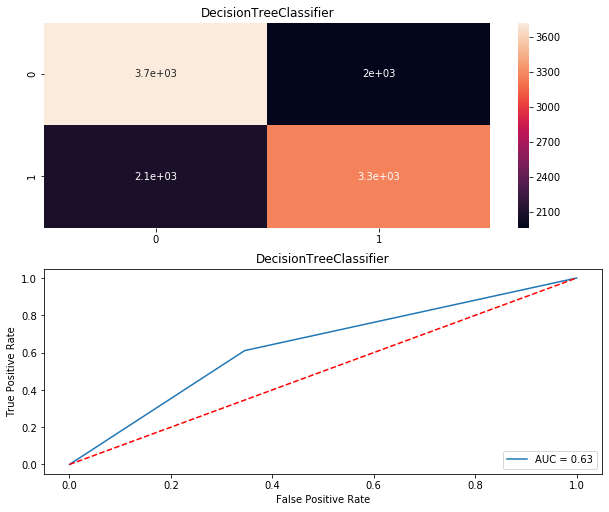

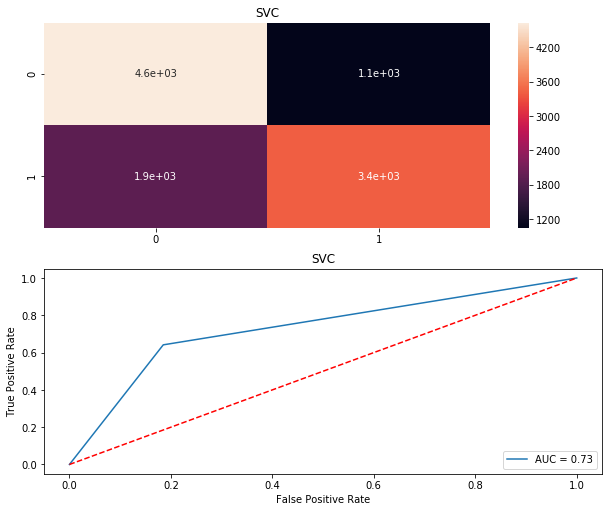

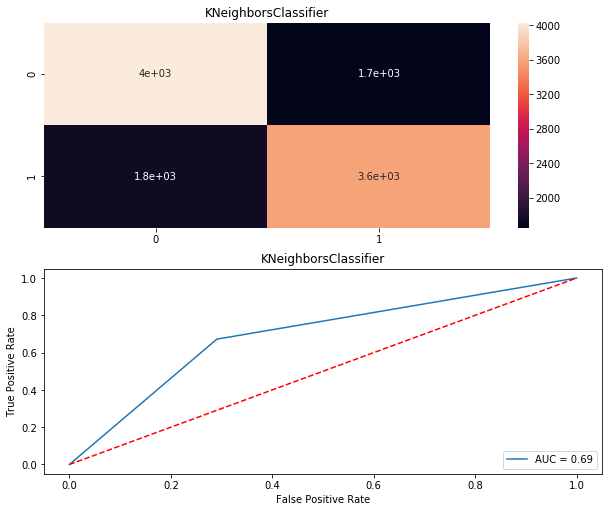

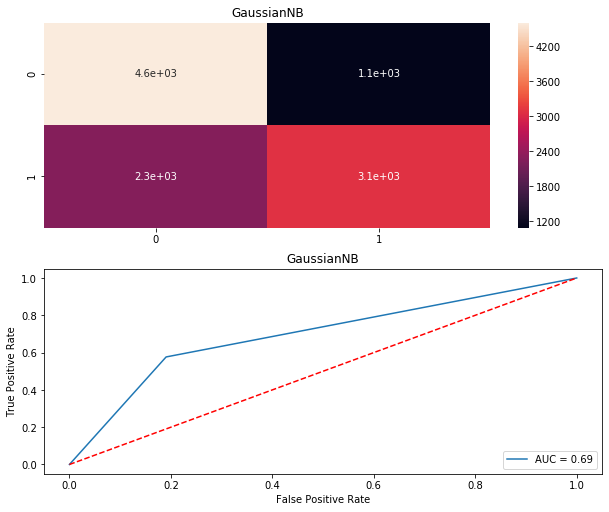

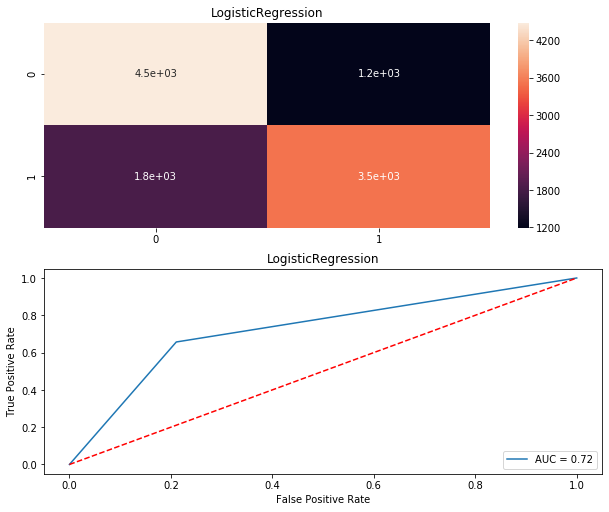

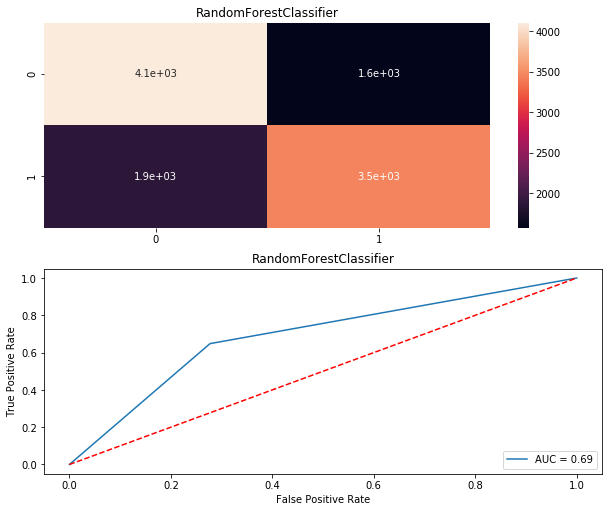

In [29]:
Model=[]
Score=[]
CVS=[]
rocscore=[]
for name,model in models:
    print('****************', name, '****************')
    print('\n')
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    print('\n')
    AS= accuracy_score(test_y,pre)
    print('Accuracy Score = ', AS)
    Score.append(AS*100)
    print('\n')
    SC=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Value Score = ', SC)
    CVS.append(SC*100)
    print('\n')
    false_positive_rate, true_positive_rate,thresolds= roc_curve(test_y,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification_report \n', classification_report(test_y,pre))
    print('\n')
    cm= confusion_matrix(test_y,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [30]:
result= pd.DataFrame({'Model' : Model, 'Accuracy_Score' : Score, 'Cross_val_score' : CVS, 'Roc_auc_curve': rocscore})
result

,Model,Accuracy_Score,Cross_val_score,Roc_auc_curve
0,DecisionTreeClassifier,63.329706,63.745002,63.262401
1,SVC,73.095756,73.302489,72.829831
2,KNeighborsClassifier,69.133116,69.630000,69.075718
3,GaussianNB,69.659050,69.987298,69.302265
4,LogisticRegression,72.515415,72.597025,72.312370
5,RandomForestClassifier,68.661589,68.603535,68.546998
